<a href="https://colab.research.google.com/github/ChiamakaAgu/ENDG-511-Final-Project/blob/main/ENDG_511_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Sleep Disorder Analysis and Preliminary Diagnosis Using EEG**

### Imports

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

import sys

# Add the path to the data folder
sys.path.append('/content/drive/My Drive/ENDG 511/Project/')

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/ENDG 511/Project/'): #list all files under the input directory
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
! pip install --upgrade mne
import mne  #package for processing EEG signals


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 61.3 MB/s eta 0:00:00


In [ ]:
normal_dir = '/content/drive/My Drive/ENDG 511/Project/data/normal/'

normal_files = [f for f in os.listdir(normal_dir) if f.endswith('.edf')]
normal_files

['SC4001E0-PSG.edf',
 'SC4002E0-PSG.edf',
 'SC4011E0-PSG.edf',
 'SC4012E0-PSG.edf',
 'SC4021E0-PSG.edf',
 'SC4022E0-PSG.edf',
 'SC4031E0-PSG.edf',
 'SC4032E0-PSG.edf',
 'SC4041E0-PSG.edf',
 'SC4042E0-PSG.edf',
 'SC4051E0-PSG.edf',
 'SC4052E0-PSG.edf',
 'SC4061E0-PSG.edf',
 'SC4062E0-PSG.edf',
 'SC4071E0-PSG.edf',
 'SC4072E0-PSG.edf',
 'SC4081E0-PSG.edf',
 'SC4082E0-PSG.edf',
 'SC4091E0-PSG.edf',
 'SC4092E0-PSG.edf',
 'SC4101E0-PSG.edf',
 'SC4102E0-PSG.edf',
 'SC4111E0-PSG.edf',
 'SC4112E0-PSG.edf',
 'SC4121E0-PSG.edf',
 'SC4122E0-PSG.edf',
 'SC4131E0-PSG.edf',
 'SC4141E0-PSG.edf',
 'SC4142E0-PSG.edf',
 'SC4151E0-PSG.edf',
 'SC4152E0-PSG.edf',
 'SC4161E0-PSG.edf',
 'SC4162E0-PSG.edf',
 'SC4171E0-PSG.edf',
 'SC4172E0-PSG.edf',
 'SC4181E0-PSG.edf',
 'SC4182E0-PSG.edf',
 'SC4191E0-PSG.edf',
 'SC4192E0-PSG.edf',
 'SC4201E0-PSG.edf',
 'SC4202E0-PSG.edf',
 'SC4211E0-PSG.edf',
 'SC4212E0-PSG.edf',
 'SC4221E0-PSG.edf',
 'SC4222E0-PSG.edf',
 'SC4231E0-PSG.edf',
 'SC4232E0-PSG.edf',
 'SC4241E0-PS

### Sample data plotting

Extracting EDF parameters from /content/drive/My Drive/ENDG 511/Project/data/normal/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-4-c6508550bd82>:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data1 = mne.io.read_raw_edf(data1_path, preload=True)
<ipython-input-4-c6508550bd82>:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data1 = mne.io.read_raw_edf(data1_path, preload=True)
<ipython-input-4-c6508550bd82>:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw_data1 = mne.io.read_raw_edf(data1_path, preload=True)


Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, first_name: Female, last_name: 33yr>
>
Using matplotlib as 2D backend.


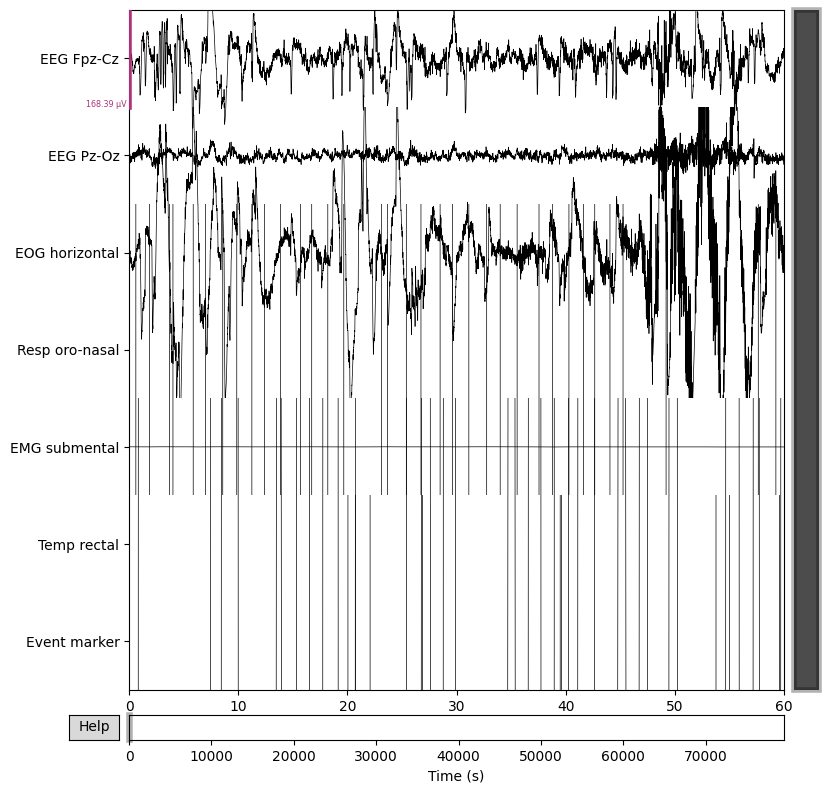

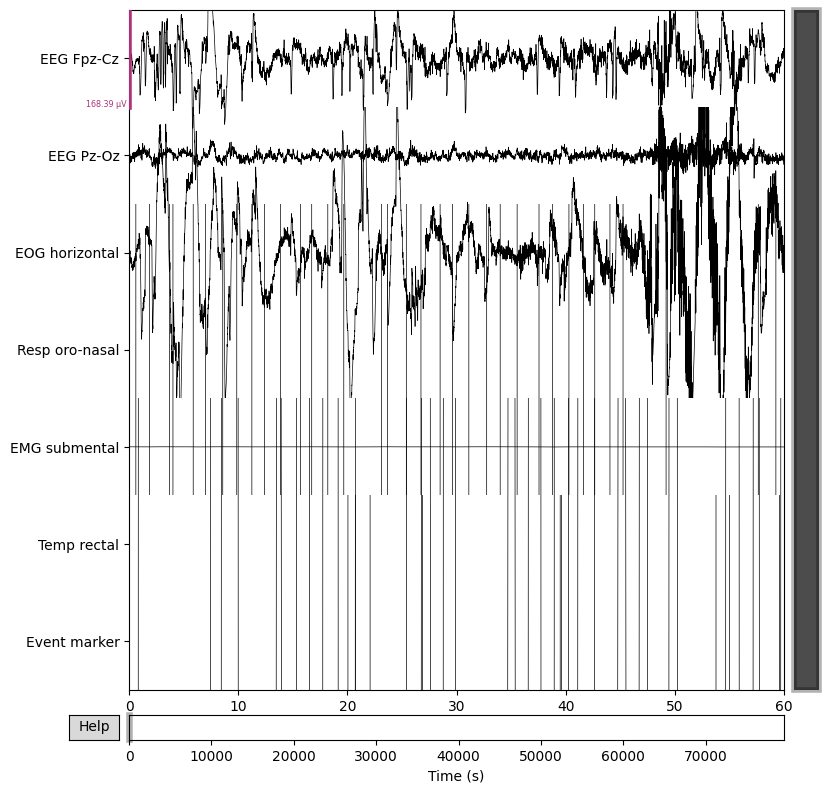

In [ ]:
data1 = normal_files[0]
data1_path = os.path.join(normal_dir, data1)
raw_data1 = mne.io.read_raw_edf(data1_path, preload=True)
print(raw_data1.info)
raw_data1.plot(n_channels=10, duration=60, scalings='auto', title='Raw EEG Data')

### Visualizing just the EEG signals of the firdt five files

Extracting EDF parameters from /content/drive/My Drive/ENDG 511/Project/data/normal/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)
<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)
<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)


Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...
File 1: SC4001E0-PSG.edf
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, first_name: Female, last_name: 33yr>
>
Extracting EDF parameters from /content/drive/My Drive/ENDG 511/Project/data/normal/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8489999  =      0.000 ... 84899.990 secs...


<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)
<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)
<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)


File 2: SC4002E0-PSG.edf
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-04-25 14:50:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, first_name: Female, last_name: 33yr>
>
Extracting EDF parameters from /content/drive/My Drive/ENDG 511/Project/data/normal/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8405999  =      0.000 ... 84059.990 secs...


<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)
<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)
<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)


File 3: SC4011E0-PSG.edf
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-03-29 16:49:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, first_name: Female, last_name: 33yr>
>
Extracting EDF parameters from /content/drive/My Drive/ENDG 511/Project/data/normal/SC4012E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8549999  =      0.000 ... 85499.990 secs...


<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)
<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)
<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)


File 4: SC4012E0-PSG.edf
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-03-30 17:00:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, first_name: Female, last_name: 33yr>
>
Extracting EDF parameters from /content/drive/My Drive/ENDG 511/Project/data/normal/SC4021E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8411999  =      0.000 ... 84119.990 secs...


<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)
<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)
<ipython-input-4-04fa79f8c6b0>:9: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(data_path, preload=True)


File 5: SC4021E0-PSG.edf
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-04-05 16:48:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, first_name: Female, last_name: 26yr>
>


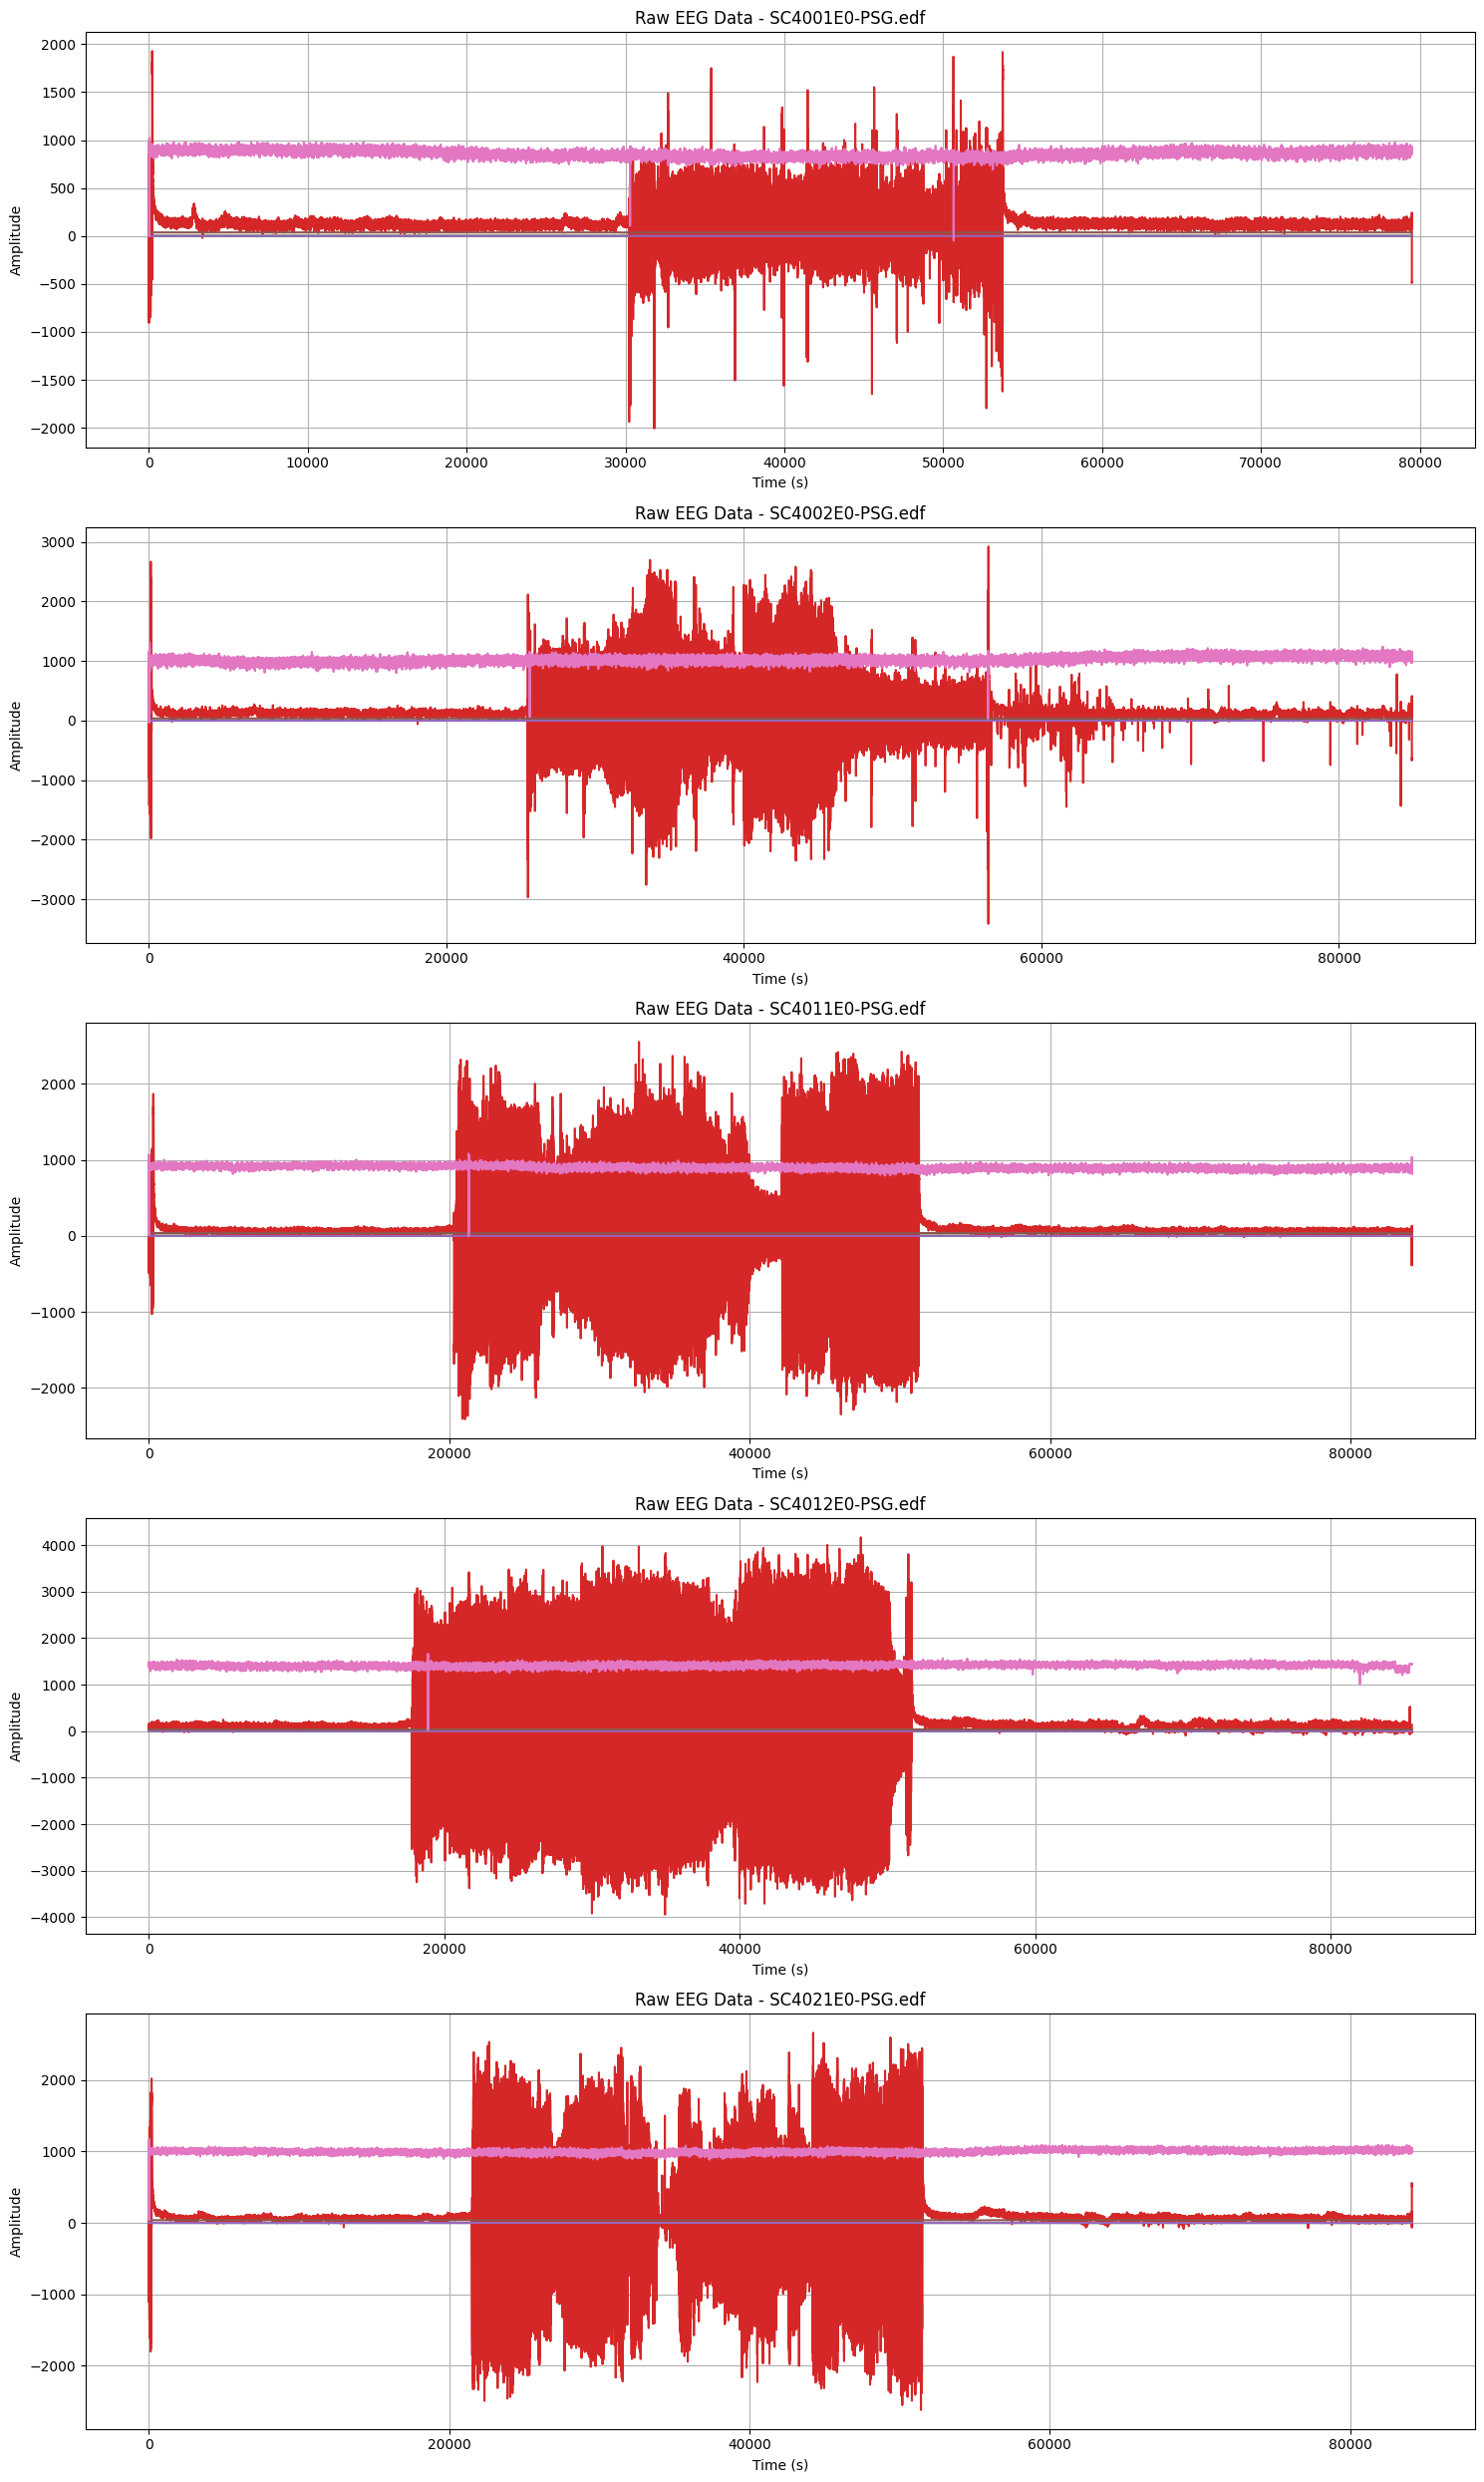

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(15, 25))

for i in range(5):
    data_file = normal_files[i]
    data_path = os.path.join(normal_dir, data_file)

    # Read the raw data from the EDF file
    try:
        raw_data = mne.io.read_raw_edf(data_path, preload=True)

        # Print some basic information about the data
        print(f"File {i+1}: {data_file}")
        print(raw_data.info)

        if len(raw_data.ch_names) == 0:
            print(f"File {data_file} has no data channels. Skipping...")
            continue

        # Plot the raw data in the corresponding subplot
        # Convert the raw data to a numpy array and plot it
        data, times = raw_data[:, :][0], raw_data.times
        ax = axes[i]
        ax.plot(times, data.T)
        ax.set_title(f'Raw EEG Data - {data_file}')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Amplitude')
        ax.grid(True)

    except Exception as e:
        print(f"Error processing file {data_file}: {e}")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Isolating, Preprocessing, and converting the **Normal** EEG signals to numpy array files (.npy) for easier access

In [ ]:
from mne.preprocessing import ICA


for i in range(len(normal_files)):
  # Process file
  data_file = normal_files[i]
  data_path = os.path.join(normal_dir, data_file)

  try:
      raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
      print(f"Processing {data_file}")
  except Exception as e:
      print(f"Error loading {data_file}: {e}")
      exit()

  # Detect bad channels (flat signals)
  bad_channels = []
  for ch in raw.ch_names:
      data, _ = raw[ch, :]
      if np.std(data) < 1e-10:
          bad_channels.append(ch)

  if bad_channels:
      raw.info["bads"] = bad_channels
      raw.drop_channels(bad_channels)
      print(f"Removed bad channels: {bad_channels}")
  else:
      print("No bad channels detected.")

  # Apply Band-pass filtering (0.5 - 40 Hz)
  raw.load_data()
  raw.set_eeg_reference()
  raw.filter(l_freq=0.5, h_freq=40.0, method='fir')
  print("Applied band-pass filter (0.5 - 40 Hz)")

  # Apply ICA with an adaptive number of components
  ica = ICA(n_components=0.999999, random_state=42)
  ica.fit(raw)

  # Copy the raw data and apply ICA
  raw_cleaned = raw.copy()
  ica.apply(raw_cleaned)

  # Extract EEG data and time
  data, times = raw_cleaned.get_data(), raw_cleaned.times
  sampling_rate = raw_cleaned.info['sfreq']

  eeg_data = raw_cleaned.get_data(picks="eeg")[0]  # Extract EEG signal
  np.save(f'/content/drive/My Drive/ENDG 511/Project/data2/normal/normal{i}.npy', eeg_data) #save array to numpy file

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4001E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4002E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4011E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4012E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4021E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4022E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4031E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4032E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 9.9s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4041E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 6.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4042E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4051E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4052E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4061E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 18.7s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4062E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.2s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4071E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4072E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4081E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 9.0s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4082E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 12.7s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4091E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4092E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 9.0s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4101E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.2s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4102E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4111E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4112E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4121E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4122E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.2s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4131E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4141E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.8s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4142E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4151E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.1s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4152E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4161E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.1s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4162E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4171E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.7s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4172E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4181E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4182E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 22.2s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4191E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.1s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4192E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 6.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4201E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 12.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4202E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.0s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4211E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4212E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 6.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4221E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4222E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4231E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4232E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.0s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4241E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4242E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4251E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.1s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4252E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4261F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4262F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4271F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.5s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4272F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4281G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4282G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 13.1s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4291G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.2s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4292G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 9.1s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4301E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4302E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.2s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4311E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4312E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4321E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4322E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.1s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4331F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.7s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4332F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 9.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4341F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4342F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4351F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4352F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4362F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 8.0s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4371F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.1s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4372F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.2s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4381F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4382F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4401E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 6.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4402E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4411E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4412E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.8s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4421E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 12.3s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4422E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.7s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4431E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4432E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4441E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 6.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4442E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 9.8s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4451F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.7s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4452F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4461F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.2s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4462F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4471F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 9.0s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4472F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.7s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4482F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4491G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 12.5s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4492G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 7.8s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4501E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 9.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4502E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4511E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4512E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4522E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4531E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.8s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4532E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4541F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4542F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4551F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4552F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4561F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4562F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.2s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4571F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4572F0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.7s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4581G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 12.2s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4582G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 9.5s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4591G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 12.6s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4592G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 15.7s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4601E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 35.8s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4602E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4611E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.5s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4612E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 6.9s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4621E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.7s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4622E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4631E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 14.0s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4632E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 9.6s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4641E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.1s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4642E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 9.5s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4651E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 11.4s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4652E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.1s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4661E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.7s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4662E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 11.2s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4671G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.0s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4672G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.1s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4701E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 13.9s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4702E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.8s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4711E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.7s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4712E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 9.7s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4721E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 9.9s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4722E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.5s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4731E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 13.6s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4732E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.8s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4741E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 10.0s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4742E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 11.0s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4751E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 19.9s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4752E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 17.1s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4761E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 9.8s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4762E0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 15.2s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4771G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 16.9s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4772G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.7s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4801G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 8.2s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4802G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 2 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4811G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 16.7s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4812G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 8.8s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroin

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4821G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.4s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-4-e493b965c9af>:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing SC4822G0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by explained variance: 3 components
Fitting ICA took 10.1s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroi

In [ ]:
isomnia_dir = '/content/drive/My Drive/ENDG 511/Project/data/insomnia/'

isomnia_files = [f for f in os.listdir(isomnia_dir) if f.endswith('.edf')]
isomnia_files

['ST7151J0-PSG.edf',
 'ST7212J0-PSG.edf',
 'ST7081J0-PSG.edf',
 'ST7092J0-PSG.edf',
 'ST7131J0-PSG.edf',
 'ST7112J0-PSG.edf',
 'ST7071J0-PSG.edf',
 'ST7061J0-PSG.edf',
 'ST7152J0-PSG.edf',
 'ST7171J0-PSG.edf',
 'ST7181J0-PSG.edf',
 'ST7182J0-PSG.edf',
 'ST7122J0-PSG.edf',
 'ST7082J0-PSG.edf',
 'ST7041J0-PSG.edf',
 'ST7042J0-PSG.edf',
 'ST7162J0-PSG.edf',
 'ST7101J0-PSG.edf',
 'ST7221J0-PSG.edf',
 'ST7242J0-PSG.edf',
 'ST7072J0-PSG.edf',
 'ST7011J0-PSG.edf',
 'ST7091J0-PSG.edf',
 'ST7111J0-PSG.edf',
 'ST7021J0-PSG.edf',
 'ST7192J0-PSG.edf',
 'ST7202J0-PSG.edf',
 'ST7241J0-PSG.edf',
 'ST7141J0-PSG.edf',
 'ST7161J0-PSG.edf',
 'ST7172J0-PSG.edf',
 'ST7191J0-PSG.edf',
 'ST7062J0-PSG.edf',
 'ST7012J0-PSG.edf',
 'ST7211J0-PSG.edf',
 'ST7201J0-PSG.edf',
 'ST7052J0-PSG.edf',
 'ST7121J0-PSG.edf',
 'ST7132J0-PSG.edf',
 'ST7022J0-PSG.edf',
 'ST7102J0-PSG.edf',
 'ST7051J0-PSG.edf',
 'ST7142J0-PSG.edf',
 'ST7222J0-PSG.edf']

# Isolating, Preprocessing, and converting the **insomnia** EEG signals to numpy array files (.npy) for easier access

In [ ]:
for i in range(len(isomnia_files)):
  # Process file
  data_file = isomnia_files[i]
  data_path = os.path.join(isomnia_dir, data_file)

  try:
      raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
      print(f"Processing {data_file}")
  except Exception as e:
      print(f"Error loading {data_file}: {e}")
      exit()

  # Detect bad channels (flat signals)
  bad_channels = []
  for ch in raw.ch_names:
      data, _ = raw[ch, :]
      if np.std(data) < 1e-10:
          bad_channels.append(ch)

  if bad_channels:
      raw.info["bads"] = bad_channels
      raw.drop_channels(bad_channels)
      print(f"Removed bad channels: {bad_channels}")
  else:
      print("No bad channels detected.")

  # Apply Band-pass filtering (0.5 - 40 Hz)
  raw.load_data()
  raw.set_eeg_reference()
  raw.filter(l_freq=0.5, h_freq=40.0, method='fir')
  print("Applied band-pass filter (0.5 - 40 Hz)")

  # Apply ICA with an adaptive number of components
  ica = ICA(n_components=0.999999999, random_state=42)
  ica.fit(raw)

  # Copy the raw data and apply ICA
  raw_cleaned = raw.copy()
  ica.apply(raw_cleaned)

  # Extract EEG data and time
  data, times = raw_cleaned.get_data(), raw_cleaned.times
  sampling_rate = raw_cleaned.info['sfreq']

  eeg_data = raw_cleaned.get_data(picks="eeg")[0]  # Extract EEG signal
  np.save(f'/content/drive/My Drive/ENDG 511/Project/data2/insomnia/isomnia{i}.npy', eeg_data) #save array to numpy file

<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7151J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.7e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 8.6s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7212J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (5.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7081J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.4s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7092J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (4.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7131J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.3s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7112J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (2.6e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7071J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (2e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7061J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.3e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.8s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7152J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (8.8e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7171J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (7.4e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 7.0s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7181J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (9.7e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.4s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7182J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (5e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7122J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (6.6e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.7s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7082J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.5e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.2s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7041J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.8e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Fitting ICA took 10.5s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7042J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 7.1s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7162J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.5e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.6s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7101J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.3e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.8s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7221J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (8.2e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.1s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7242J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (2.7e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 8.0s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7072J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.4e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7011J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.7e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 7.8s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7091J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.6s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7111J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.5s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7021J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (2e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.5s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7192J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.6e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.5s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7202J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.2e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7241J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (2.9e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.8s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7141J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.7e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7161J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.4e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7172J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.2e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.5s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7191J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (5.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.5s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7062J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (2.2e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 11.8s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7012J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (6.3e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.5s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7211J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (3e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.7s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7201J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.1e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.4s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7052J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.4e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 10.8s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7121J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (2.9e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.8s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7132J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (2.5e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.7s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7022J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (5.7e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.8s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7102J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (3.6e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.4s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7051J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (6.8e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 5.5s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7142J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (4e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 6.3s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
<ipython-input-10-49ea973f0f9c>:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)


Processing ST7222J0-PSG.edf
No bad channels detected.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Applied band-pass filter (0.5 - 40 Hz)
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by explained variance: 4 components


<ipython-input-10-49ea973f0f9c>:35: RuntimeWarning: Using n_components=0.999999999 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (3.4e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


## Model training using pytorch a hybrid of EEG band power input and pretrained MobilenetV2 on spectograms made from the EEG signals

In [ ]:
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             auc, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
from torchvision import models, transforms
from tqdm import tqdm

# --- Configuration ---
data_dir = "/content/drive/My Drive/ENDG 511/Project/data2/" # Dataset directory (.npy files)
classes = ['normal', 'insomnia']  # Binary classification
img_size = (224, 224) # Input size for CNN
sample_rate = 100 # EEG sample rate (given in the info section of the provided dataset)
band_limits = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)} # bandwidths pf the various brain waves present when sleeping
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def process_data():
    X_images, X_bandpower, y_labels = [], [], []
    for label, cls in enumerate(classes):
        cls_dir = os.path.join(data_dir, cls)
        for file in os.listdir(cls_dir):
            if not file.endswith(".npy"):
                continue
            file_path = os.path.join(cls_dir, file)
            eeg_data = np.load(file_path)

            # Spectrogram
            f, t, Sxx = spectrogram(eeg_data, fs=sample_rate)
            Sxx = np.log1p(Sxx)
            Sxx_resized = cv2.resize(Sxx, img_size)
            Sxx_rgb = np.stack([Sxx_resized]*3, axis=-1)

            # Band power
            freqs, psd = welch(eeg_data, fs=sample_rate)
            band_power = [psd[(freqs >= low) & (freqs <= high)].mean() for low, high in band_limits.values()]

            X_images.append(Sxx_rgb)
            X_bandpower.append(band_power)
            y_labels.append(label)

    return np.array(X_images), np.array(X_bandpower), np.array(y_labels)

X_images, X_bandpower, y = process_data()
X_images = X_images.astype(np.float32) / 255.0   # Normalize images
X_bandpower = X_bandpower.astype(np.float32)

# --- Train/val/test split ---
X_img_train, X_img_test, X_band_train, X_band_test, y_train, y_test = train_test_split(
    X_images, X_bandpower, y, test_size=0.1, stratify=y, random_state=42
)
X_img_train, X_img_val, X_band_train, X_band_val, y_train, y_val = train_test_split(
    X_img_train, X_band_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)


# --- PyTorch dataset ---

class EEGDataset(Dataset):
    def __init__(self, images, bands, labels):
        self.images = images.transpose(0, 3, 1, 2)  # Convert to CHW
        self.bands = bands
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return (torch.tensor(self.images[idx]),
                torch.tensor(self.bands[idx]),
                torch.tensor(self.labels[idx]).float())

train_dataset = EEGDataset(X_img_train, X_band_train, y_train)
val_dataset   = EEGDataset(X_img_val, X_band_val, y_val)
test_dataset  = EEGDataset(X_img_test, X_band_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32)
test_loader  = DataLoader(test_dataset, batch_size=32)

# --- Hybrid Model ---
class HybridEEGModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = models.mobilenet_v2(pretrained=True).features #pretrained last few layers
        for param in self.cnn.parameters():
            param.requires_grad = False

        self.gap = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc_band = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU()
        )
        self.classifier = nn.Sequential(
            nn.Linear(1280 + 16, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x_img, x_band):    # A feed-forward network for band power features
        x_cnn = self.cnn(x_img)
        x_cnn = self.gap(x_cnn).view(x_cnn.size(0), -1)
        x_band = self.fc_band(x_band)
        x = torch.cat((x_cnn, x_band), dim=1)
        return self.classifier(x)

model = HybridEEGModel().to(device)
criterion = nn.BCELoss()  # binary cross entropy loss for binary classifiers
optimizer = optim.Adam(model.parameters(), lr=1e-4)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 31.2MB/s]


100%|██████████| 5/5 [00:01<00:00,  2.96it/s]


Epoch 1: Train Acc = 0.5643, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.94it/s]


Epoch 2: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 38.48it/s]


Epoch 3: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.62it/s]


Epoch 4: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.97it/s]


Epoch 5: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 41.99it/s]


Epoch 6: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 41.72it/s]


Epoch 7: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 41.54it/s]


Epoch 8: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.01it/s]


Epoch 9: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 41.83it/s]


Epoch 10: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.38it/s]


Epoch 11: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 41.77it/s]


Epoch 12: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.78it/s]


Epoch 13: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.52it/s]


Epoch 14: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 40.11it/s]


Epoch 15: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.96it/s]


Epoch 16: Train Acc = 0.7714, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.89it/s]


Epoch 17: Train Acc = 0.8286, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.63it/s]


Epoch 18: Train Acc = 0.8857, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 40.76it/s]


Epoch 19: Train Acc = 0.9929, Val Acc = 0.7778


100%|██████████| 5/5 [00:00<00:00, 39.73it/s]


Epoch 20: Train Acc = 0.9643, Val Acc = 1.0000


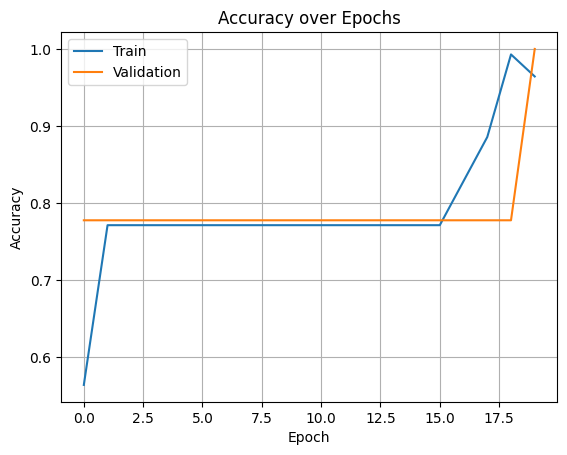

In [ ]:
# --- Training loop ---
def train_model(model, train_loader, val_loader, epochs=10):
    train_acc, val_acc = [], []
    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for imgs, bands, labels in tqdm(train_loader):
            imgs, bands, labels = imgs.to(device), bands.to(device), labels.to(device).unsqueeze(1)
            outputs = model(imgs, bands)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pred = (outputs > 0.5).float()  #classifies with sigmoid probability greater than 50 %
            correct += (pred == labels).sum().item()
            total += labels.size(0)
        train_acc.append(correct / total)

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for imgs, bands, labels in val_loader:
                imgs, bands, labels = imgs.to(device), bands.to(device), labels.to(device).unsqueeze(1)
                outputs = model(imgs, bands)
                pred = (outputs > 0.5).float()
                correct += (pred == labels).sum().item()
                total += labels.size(0)
        val_acc.append(correct / total)
        print(f"Epoch {epoch+1}: Train Acc = {train_acc[-1]:.4f}, Val Acc = {val_acc[-1]:.4f}")
    return train_acc, val_acc

train_acc, val_acc = train_model(model, train_loader, val_loader, epochs=20)

# Plot accuracy
plt.plot(train_acc, label="Train")
plt.plot(val_acc, label="Validation")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


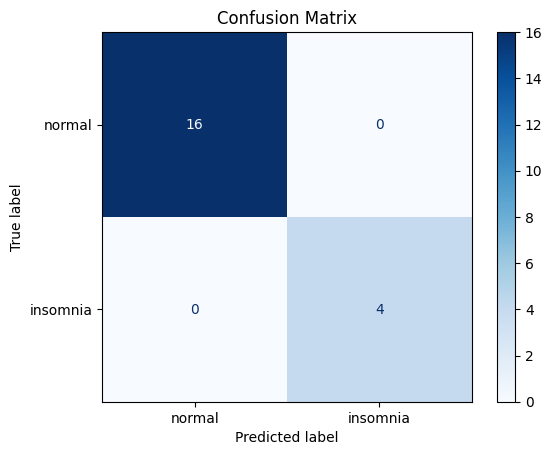


Classification Report:
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        16
    insomnia       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



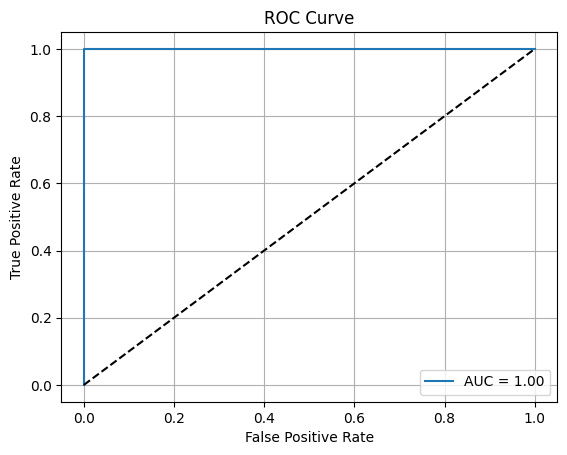

In [ ]:
def evaluate(model, loader):
    model.eval()
    all_preds, all_probs, all_labels = [], [], []
    with torch.no_grad():
        for imgs, bands, labels in loader:
            imgs, bands = imgs.to(device), bands.to(device)
            outputs = model(imgs, bands)
            probs = outputs.cpu().numpy().flatten()
            preds = (outputs.cpu() > 0.5).int().numpy().flatten()
            all_probs.extend(probs)
            all_preds.extend(preds)
            all_labels.extend(labels.numpy())
    return np.array(all_preds), np.array(all_probs), np.array(all_labels)

preds, probs, labels = evaluate(model, test_loader)

# Confusion Matrix
cm = confusion_matrix(labels, preds)
ConfusionMatrixDisplay(cm, display_labels=classes).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(labels, preds, target_names=classes))

# ROC Curve
fpr, tpr, _ = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()


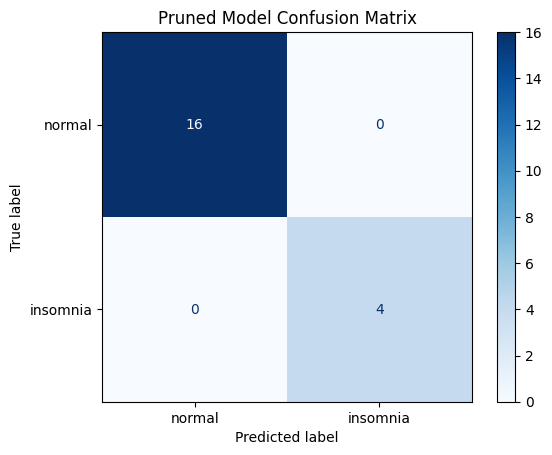


Pruned Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



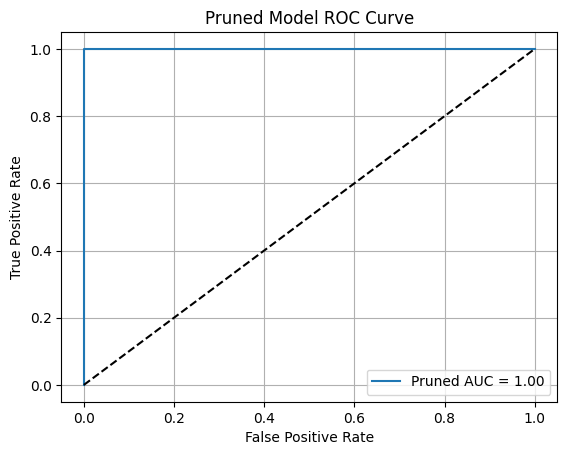

In [ ]:
import torch.nn.utils.prune as prune

# Prune 40% of the classifier layer weights
for name, module in model.classifier.named_modules():
    if isinstance(module, nn.Linear):
        prune.ln_structured(module, name='weight', amount=0.4, n=2, dim=0)

# Re-evaluate after pruning
pruned_preds, pruned_probs, pruned_labels = evaluate(model, test_loader)

# Re-evaluation plots
cm = confusion_matrix(pruned_labels, pruned_preds)
ConfusionMatrixDisplay(cm, display_labels=classes).plot(cmap="Blues")
plt.title("Pruned Model Confusion Matrix")
plt.grid(False)
plt.show()

print("\nPruned Classification Report:\n", classification_report(pruned_labels, pruned_preds))

fpr, tpr, _ = roc_curve(pruned_labels, pruned_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Pruned AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Pruned Model ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()
